# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

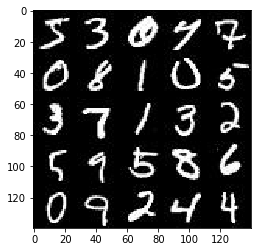

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

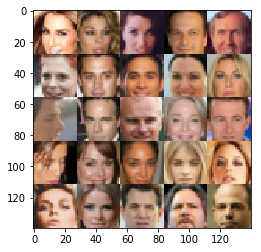

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/gaidys/anaconda/envs/tensorflow_1_0/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name = 'input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learn_rate = tf.placeholder(tf.float32, name = 'learn_rate')

    return input_real, input_z, learn_rate




"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False,  alpha = 0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
       
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        
        flat = tf.reshape(relu2, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True,  alpha = 0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
   
    with tf.variable_scope('generator', reuse = not is_train):
        
        x1 = tf.reshape(tf.layers.dense(z, 4*4*256), (-1,4,4,256))
        bn1 = tf.layers.batch_normalization(x1, training=is_train)
        relu1 = tf.maximum(alpha * bn1, bn1)
        
        x2 = tf.layers.conv2d_transpose(relu1, 128, 5, strides=3, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=is_train)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        x3 = tf.layers.conv2d_transpose(relu2, 64, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=is_train)
        relu3 = tf.maximum(alpha * bn3, bn3)
        
        logits = tf.layers.conv2d_transpose(relu3, out_channel_dim, 5, strides=1, padding='valid')
        
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)
    
    #added smoothing parameter as suggested by reviwer:
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*.9))

    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model

    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, learn_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    i = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                i += 1
                batch_z = np.random.uniform(-1, 1, size = [batch_size, z_dim])
                
                # Compensate for tanh [-1,1] x RGB [-.5,.5] range disparity, as required by reviewer
                if data_image_mode == 'RGB':
                    batch_images *= 2.0
                    
                feed_dict = {input_real: batch_images,
                             input_z: batch_z,
                             learn_rate: learning_rate}
                _ = sess.run(d_opt, feed_dict = feed_dict)
                _ = sess.run(g_opt, feed_dict = feed_dict)
                _ = sess.run(g_opt, feed_dict = feed_dict) # as suggested by reviewer
                _ = sess.run(g_opt, feed_dict = feed_dict) # as suggested by reviewer
                
                if i % 10 == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    if i % 100 == 0:
                        show_generator_output(sess, 25, input_z, image_channels, data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 3.2733... Generator Loss: 0.0653
Epoch 1/2... Discriminator Loss: 1.2824... Generator Loss: 0.8677
Epoch 1/2... Discriminator Loss: 0.9655... Generator Loss: 0.8614
Epoch 1/2... Discriminator Loss: 0.7622... Generator Loss: 1.9440
Epoch 1/2... Discriminator Loss: 1.3507... Generator Loss: 1.6054
Epoch 1/2... Discriminator Loss: 1.4566... Generator Loss: 0.5127
Epoch 1/2... Discriminator Loss: 1.4903... Generator Loss: 0.6173
Epoch 1/2... Discriminator Loss: 1.5149... Generator Loss: 0.5190
Epoch 1/2... Discriminator Loss: 1.4874... Generator Loss: 0.7181
Epoch 1/2... Discriminator Loss: 1.6049... Generator Loss: 0.4438


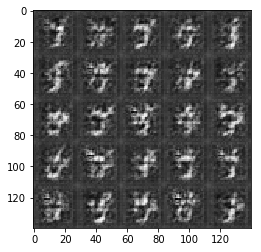

Epoch 1/2... Discriminator Loss: 1.5426... Generator Loss: 0.5224
Epoch 1/2... Discriminator Loss: 1.5463... Generator Loss: 0.8309
Epoch 1/2... Discriminator Loss: 1.4763... Generator Loss: 0.5260
Epoch 1/2... Discriminator Loss: 1.7357... Generator Loss: 0.3150
Epoch 1/2... Discriminator Loss: 1.4569... Generator Loss: 0.5694
Epoch 1/2... Discriminator Loss: 1.3615... Generator Loss: 0.9361
Epoch 1/2... Discriminator Loss: 1.2973... Generator Loss: 1.5834
Epoch 1/2... Discriminator Loss: 1.5670... Generator Loss: 0.4702
Epoch 1/2... Discriminator Loss: 1.5359... Generator Loss: 0.4641
Epoch 1/2... Discriminator Loss: 1.4374... Generator Loss: 0.5394


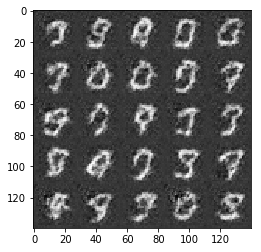

Epoch 1/2... Discriminator Loss: 1.1784... Generator Loss: 1.1531
Epoch 1/2... Discriminator Loss: 1.4519... Generator Loss: 0.9974
Epoch 1/2... Discriminator Loss: 1.4663... Generator Loss: 0.9097
Epoch 1/2... Discriminator Loss: 1.2875... Generator Loss: 1.1868
Epoch 1/2... Discriminator Loss: 1.7187... Generator Loss: 0.3671
Epoch 1/2... Discriminator Loss: 1.5358... Generator Loss: 0.6278
Epoch 1/2... Discriminator Loss: 1.4730... Generator Loss: 0.5300
Epoch 1/2... Discriminator Loss: 1.5353... Generator Loss: 0.4477
Epoch 1/2... Discriminator Loss: 1.6322... Generator Loss: 0.4223
Epoch 1/2... Discriminator Loss: 1.3996... Generator Loss: 0.8105


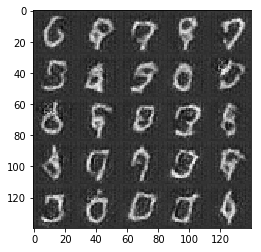

Epoch 1/2... Discriminator Loss: 1.3879... Generator Loss: 0.8575
Epoch 1/2... Discriminator Loss: 1.4008... Generator Loss: 0.9372
Epoch 1/2... Discriminator Loss: 1.4246... Generator Loss: 0.5762
Epoch 1/2... Discriminator Loss: 1.4766... Generator Loss: 0.9221
Epoch 1/2... Discriminator Loss: 1.4848... Generator Loss: 1.2460
Epoch 1/2... Discriminator Loss: 1.5593... Generator Loss: 0.9431
Epoch 1/2... Discriminator Loss: 1.7364... Generator Loss: 0.3169
Epoch 1/2... Discriminator Loss: 1.4445... Generator Loss: 0.5199
Epoch 1/2... Discriminator Loss: 1.4269... Generator Loss: 0.5661
Epoch 1/2... Discriminator Loss: 1.3757... Generator Loss: 0.6277


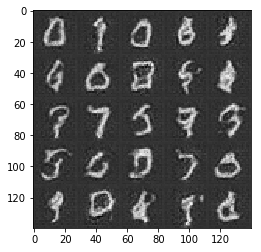

Epoch 1/2... Discriminator Loss: 1.7934... Generator Loss: 0.2956
Epoch 1/2... Discriminator Loss: 1.4018... Generator Loss: 0.7155
Epoch 1/2... Discriminator Loss: 1.5485... Generator Loss: 0.4337
Epoch 1/2... Discriminator Loss: 1.5328... Generator Loss: 0.4739
Epoch 1/2... Discriminator Loss: 1.6339... Generator Loss: 0.3670
Epoch 1/2... Discriminator Loss: 1.4707... Generator Loss: 0.4948
Epoch 1/2... Discriminator Loss: 1.4729... Generator Loss: 0.5206
Epoch 1/2... Discriminator Loss: 1.5006... Generator Loss: 0.5165
Epoch 1/2... Discriminator Loss: 1.6606... Generator Loss: 0.3876
Epoch 1/2... Discriminator Loss: 1.4904... Generator Loss: 0.8958


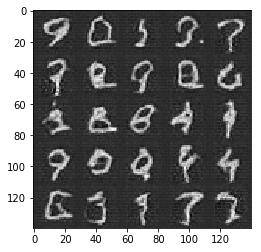

Epoch 1/2... Discriminator Loss: 1.3447... Generator Loss: 0.9412
Epoch 1/2... Discriminator Loss: 1.7118... Generator Loss: 0.6402
Epoch 1/2... Discriminator Loss: 1.5250... Generator Loss: 0.8613
Epoch 1/2... Discriminator Loss: 1.5879... Generator Loss: 0.3926
Epoch 1/2... Discriminator Loss: 1.3601... Generator Loss: 0.9636
Epoch 1/2... Discriminator Loss: 1.5086... Generator Loss: 1.1049
Epoch 1/2... Discriminator Loss: 1.5062... Generator Loss: 0.4966
Epoch 1/2... Discriminator Loss: 1.3493... Generator Loss: 1.2101
Epoch 1/2... Discriminator Loss: 1.4404... Generator Loss: 0.7212
Epoch 1/2... Discriminator Loss: 1.4604... Generator Loss: 0.6384


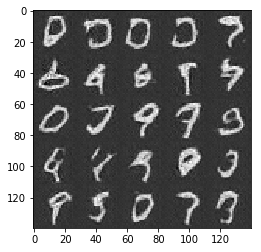

Epoch 1/2... Discriminator Loss: 1.4142... Generator Loss: 0.6481
Epoch 1/2... Discriminator Loss: 1.5593... Generator Loss: 1.1069
Epoch 1/2... Discriminator Loss: 1.5319... Generator Loss: 0.4415
Epoch 1/2... Discriminator Loss: 1.3992... Generator Loss: 0.7801
Epoch 1/2... Discriminator Loss: 1.8448... Generator Loss: 0.2862
Epoch 1/2... Discriminator Loss: 1.7767... Generator Loss: 0.3087
Epoch 1/2... Discriminator Loss: 1.5256... Generator Loss: 0.5046
Epoch 1/2... Discriminator Loss: 1.5848... Generator Loss: 0.4458
Epoch 1/2... Discriminator Loss: 1.4638... Generator Loss: 0.7249
Epoch 1/2... Discriminator Loss: 1.6141... Generator Loss: 0.8676


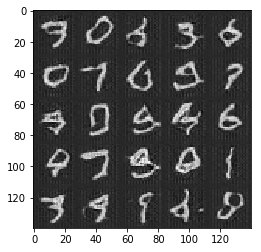

Epoch 1/2... Discriminator Loss: 1.6334... Generator Loss: 0.3807
Epoch 1/2... Discriminator Loss: 1.4760... Generator Loss: 0.6002
Epoch 1/2... Discriminator Loss: 1.4881... Generator Loss: 0.6306
Epoch 1/2... Discriminator Loss: 1.4128... Generator Loss: 0.8169
Epoch 1/2... Discriminator Loss: 1.5192... Generator Loss: 0.9768
Epoch 1/2... Discriminator Loss: 1.4560... Generator Loss: 0.6274
Epoch 1/2... Discriminator Loss: 1.5082... Generator Loss: 0.5429
Epoch 1/2... Discriminator Loss: 1.7750... Generator Loss: 1.3967
Epoch 1/2... Discriminator Loss: 1.5283... Generator Loss: 0.5433
Epoch 1/2... Discriminator Loss: 1.5455... Generator Loss: 0.7750


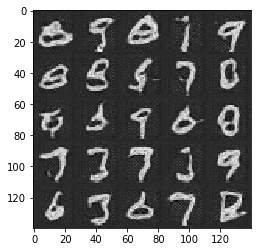

Epoch 1/2... Discriminator Loss: 1.4471... Generator Loss: 0.6661
Epoch 1/2... Discriminator Loss: 1.6015... Generator Loss: 0.4882
Epoch 1/2... Discriminator Loss: 1.5274... Generator Loss: 0.5535
Epoch 1/2... Discriminator Loss: 1.4828... Generator Loss: 0.5612
Epoch 1/2... Discriminator Loss: 1.7745... Generator Loss: 1.4043
Epoch 1/2... Discriminator Loss: 1.6817... Generator Loss: 0.4183
Epoch 1/2... Discriminator Loss: 1.6742... Generator Loss: 0.5784
Epoch 1/2... Discriminator Loss: 1.3823... Generator Loss: 0.7996
Epoch 1/2... Discriminator Loss: 1.4953... Generator Loss: 0.5796
Epoch 1/2... Discriminator Loss: 1.4646... Generator Loss: 0.6951


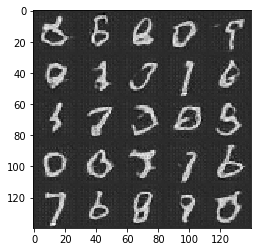

Epoch 1/2... Discriminator Loss: 1.4571... Generator Loss: 0.7625
Epoch 1/2... Discriminator Loss: 1.4371... Generator Loss: 0.6608
Epoch 1/2... Discriminator Loss: 1.6606... Generator Loss: 0.3861
Epoch 2/2... Discriminator Loss: 1.4777... Generator Loss: 0.5423
Epoch 2/2... Discriminator Loss: 1.4609... Generator Loss: 0.7725
Epoch 2/2... Discriminator Loss: 1.5181... Generator Loss: 0.5103
Epoch 2/2... Discriminator Loss: 1.5786... Generator Loss: 1.1877
Epoch 2/2... Discriminator Loss: 1.5080... Generator Loss: 0.7180
Epoch 2/2... Discriminator Loss: 1.6268... Generator Loss: 0.4759
Epoch 2/2... Discriminator Loss: 1.4960... Generator Loss: 0.6303


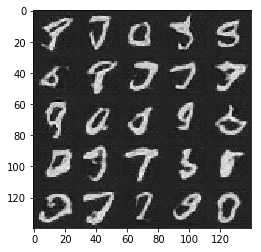

Epoch 2/2... Discriminator Loss: 1.7074... Generator Loss: 0.3512
Epoch 2/2... Discriminator Loss: 1.6490... Generator Loss: 0.3797
Epoch 2/2... Discriminator Loss: 1.3867... Generator Loss: 0.8178
Epoch 2/2... Discriminator Loss: 1.5696... Generator Loss: 0.7763
Epoch 2/2... Discriminator Loss: 1.5021... Generator Loss: 0.7003
Epoch 2/2... Discriminator Loss: 1.5188... Generator Loss: 0.7230
Epoch 2/2... Discriminator Loss: 1.5273... Generator Loss: 0.6988
Epoch 2/2... Discriminator Loss: 1.5035... Generator Loss: 0.6716
Epoch 2/2... Discriminator Loss: 1.4903... Generator Loss: 0.6449
Epoch 2/2... Discriminator Loss: 1.4771... Generator Loss: 0.6127


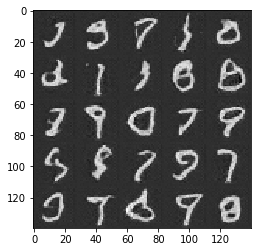

Epoch 2/2... Discriminator Loss: 1.4980... Generator Loss: 0.8828
Epoch 2/2... Discriminator Loss: 1.6355... Generator Loss: 0.4152
Epoch 2/2... Discriminator Loss: 1.4572... Generator Loss: 0.5862
Epoch 2/2... Discriminator Loss: 1.5141... Generator Loss: 0.5373
Epoch 2/2... Discriminator Loss: 1.5326... Generator Loss: 0.4769
Epoch 2/2... Discriminator Loss: 1.5388... Generator Loss: 0.6488
Epoch 2/2... Discriminator Loss: 1.6944... Generator Loss: 0.3586
Epoch 2/2... Discriminator Loss: 1.4475... Generator Loss: 0.7348
Epoch 2/2... Discriminator Loss: 1.5250... Generator Loss: 0.5043
Epoch 2/2... Discriminator Loss: 1.4602... Generator Loss: 0.5942


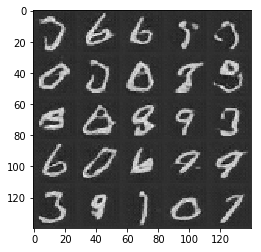

Epoch 2/2... Discriminator Loss: 1.4506... Generator Loss: 0.7567
Epoch 2/2... Discriminator Loss: 1.4674... Generator Loss: 1.0060
Epoch 2/2... Discriminator Loss: 1.6338... Generator Loss: 0.8025
Epoch 2/2... Discriminator Loss: 1.4737... Generator Loss: 0.5592
Epoch 2/2... Discriminator Loss: 1.4825... Generator Loss: 0.6671
Epoch 2/2... Discriminator Loss: 1.5656... Generator Loss: 0.4456
Epoch 2/2... Discriminator Loss: 1.6658... Generator Loss: 0.3585
Epoch 2/2... Discriminator Loss: 1.6009... Generator Loss: 0.4594
Epoch 2/2... Discriminator Loss: 1.4612... Generator Loss: 0.8154
Epoch 2/2... Discriminator Loss: 1.5171... Generator Loss: 0.8321


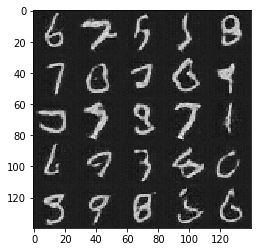

Epoch 2/2... Discriminator Loss: 1.4226... Generator Loss: 0.7286
Epoch 2/2... Discriminator Loss: 1.6621... Generator Loss: 0.4152
Epoch 2/2... Discriminator Loss: 1.5298... Generator Loss: 0.4952
Epoch 2/2... Discriminator Loss: 1.8652... Generator Loss: 0.3669
Epoch 2/2... Discriminator Loss: 1.6171... Generator Loss: 0.6080
Epoch 2/2... Discriminator Loss: 1.6096... Generator Loss: 0.4121
Epoch 2/2... Discriminator Loss: 1.4734... Generator Loss: 0.7188
Epoch 2/2... Discriminator Loss: 1.4439... Generator Loss: 0.6163
Epoch 2/2... Discriminator Loss: 1.5562... Generator Loss: 0.4594
Epoch 2/2... Discriminator Loss: 1.4994... Generator Loss: 0.6884


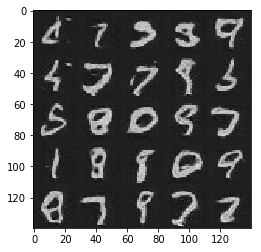

Epoch 2/2... Discriminator Loss: 1.5426... Generator Loss: 0.5055
Epoch 2/2... Discriminator Loss: 1.5685... Generator Loss: 0.5747
Epoch 2/2... Discriminator Loss: 1.3950... Generator Loss: 0.8659
Epoch 2/2... Discriminator Loss: 1.5335... Generator Loss: 0.4609
Epoch 2/2... Discriminator Loss: 1.6030... Generator Loss: 0.4176
Epoch 2/2... Discriminator Loss: 1.5135... Generator Loss: 0.7457
Epoch 2/2... Discriminator Loss: 1.5478... Generator Loss: 0.6254
Epoch 2/2... Discriminator Loss: 1.5264... Generator Loss: 0.6560
Epoch 2/2... Discriminator Loss: 1.5505... Generator Loss: 0.4469
Epoch 2/2... Discriminator Loss: 1.5883... Generator Loss: 0.4397


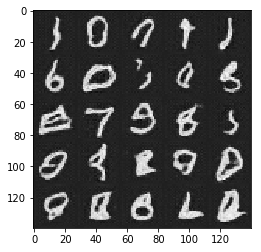

Epoch 2/2... Discriminator Loss: 1.4742... Generator Loss: 0.7701
Epoch 2/2... Discriminator Loss: 1.5415... Generator Loss: 0.4780
Epoch 2/2... Discriminator Loss: 1.4850... Generator Loss: 0.5973
Epoch 2/2... Discriminator Loss: 1.5384... Generator Loss: 0.6892
Epoch 2/2... Discriminator Loss: 1.4408... Generator Loss: 0.6000
Epoch 2/2... Discriminator Loss: 1.6378... Generator Loss: 0.4263
Epoch 2/2... Discriminator Loss: 1.5679... Generator Loss: 0.4760
Epoch 2/2... Discriminator Loss: 1.5004... Generator Loss: 0.5724
Epoch 2/2... Discriminator Loss: 1.4568... Generator Loss: 0.6650
Epoch 2/2... Discriminator Loss: 1.4421... Generator Loss: 0.8267


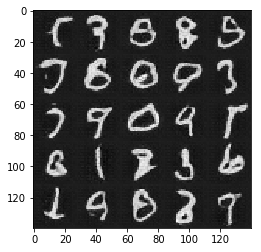

Epoch 2/2... Discriminator Loss: 1.4965... Generator Loss: 0.7987
Epoch 2/2... Discriminator Loss: 1.5948... Generator Loss: 1.0248
Epoch 2/2... Discriminator Loss: 1.5819... Generator Loss: 0.4990
Epoch 2/2... Discriminator Loss: 1.5068... Generator Loss: 0.5874
Epoch 2/2... Discriminator Loss: 1.6700... Generator Loss: 0.3748
Epoch 2/2... Discriminator Loss: 1.4518... Generator Loss: 0.5588
Epoch 2/2... Discriminator Loss: 1.4456... Generator Loss: 0.7661
Epoch 2/2... Discriminator Loss: 1.5409... Generator Loss: 0.4646
Epoch 2/2... Discriminator Loss: 1.7170... Generator Loss: 0.3439
Epoch 2/2... Discriminator Loss: 1.5551... Generator Loss: 0.5661


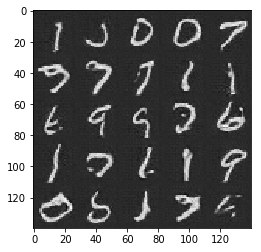

Epoch 2/2... Discriminator Loss: 1.5955... Generator Loss: 0.4381
Epoch 2/2... Discriminator Loss: 1.5322... Generator Loss: 0.7314
Epoch 2/2... Discriminator Loss: 1.5326... Generator Loss: 0.7824
Epoch 2/2... Discriminator Loss: 1.4763... Generator Loss: 0.7412
Epoch 2/2... Discriminator Loss: 1.6505... Generator Loss: 1.1323
Epoch 2/2... Discriminator Loss: 1.5356... Generator Loss: 0.8815
Epoch 2/2... Discriminator Loss: 1.5605... Generator Loss: 0.5079
Epoch 2/2... Discriminator Loss: 1.7262... Generator Loss: 0.3406
Epoch 2/2... Discriminator Loss: 1.5273... Generator Loss: 0.4897
Epoch 2/2... Discriminator Loss: 1.5854... Generator Loss: 1.0445


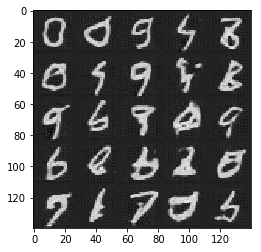

Epoch 2/2... Discriminator Loss: 1.6196... Generator Loss: 0.4489
Epoch 2/2... Discriminator Loss: 1.5616... Generator Loss: 0.5318
Epoch 2/2... Discriminator Loss: 1.5907... Generator Loss: 0.4391
Epoch 2/2... Discriminator Loss: 1.5335... Generator Loss: 0.5482
Epoch 2/2... Discriminator Loss: 1.5262... Generator Loss: 0.6293
Epoch 2/2... Discriminator Loss: 1.5897... Generator Loss: 0.4546
Epoch 2/2... Discriminator Loss: 1.5617... Generator Loss: 0.6517


In [12]:
batch_size = 64
z_dim = 128
learning_rate = .002
beta1 = .5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 5.1865... Generator Loss: 0.0135
Epoch 1/1... Discriminator Loss: 5.0990... Generator Loss: 0.0131
Epoch 1/1... Discriminator Loss: 4.1322... Generator Loss: 0.0402
Epoch 1/1... Discriminator Loss: 3.9165... Generator Loss: 0.0442
Epoch 1/1... Discriminator Loss: 3.5368... Generator Loss: 0.0679
Epoch 1/1... Discriminator Loss: 2.9922... Generator Loss: 0.1109
Epoch 1/1... Discriminator Loss: 3.3115... Generator Loss: 0.0728
Epoch 1/1... Discriminator Loss: 2.3490... Generator Loss: 0.1874
Epoch 1/1... Discriminator Loss: 3.1794... Generator Loss: 0.1040
Epoch 1/1... Discriminator Loss: 1.7979... Generator Loss: 0.3800


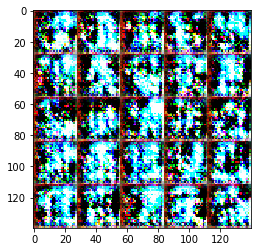

Epoch 1/1... Discriminator Loss: 2.1397... Generator Loss: 0.3935
Epoch 1/1... Discriminator Loss: 3.2583... Generator Loss: 0.0933
Epoch 1/1... Discriminator Loss: 1.3382... Generator Loss: 0.8853
Epoch 1/1... Discriminator Loss: 1.3582... Generator Loss: 0.6398
Epoch 1/1... Discriminator Loss: 1.2952... Generator Loss: 0.8587
Epoch 1/1... Discriminator Loss: 1.5056... Generator Loss: 1.0556
Epoch 1/1... Discriminator Loss: 1.7809... Generator Loss: 0.5015
Epoch 1/1... Discriminator Loss: 1.5118... Generator Loss: 0.7201
Epoch 1/1... Discriminator Loss: 1.4726... Generator Loss: 0.6329
Epoch 1/1... Discriminator Loss: 1.7572... Generator Loss: 0.5052


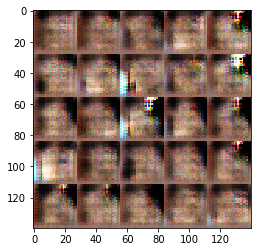

Epoch 1/1... Discriminator Loss: 1.7121... Generator Loss: 0.5154
Epoch 1/1... Discriminator Loss: 1.6495... Generator Loss: 0.5129
Epoch 1/1... Discriminator Loss: 1.7030... Generator Loss: 0.4899
Epoch 1/1... Discriminator Loss: 1.6057... Generator Loss: 0.6028
Epoch 1/1... Discriminator Loss: 1.6256... Generator Loss: 0.5585
Epoch 1/1... Discriminator Loss: 1.6629... Generator Loss: 0.6985
Epoch 1/1... Discriminator Loss: 1.5398... Generator Loss: 0.6395
Epoch 1/1... Discriminator Loss: 1.5139... Generator Loss: 0.6847
Epoch 1/1... Discriminator Loss: 1.6171... Generator Loss: 0.5986
Epoch 1/1... Discriminator Loss: 1.5325... Generator Loss: 0.6572


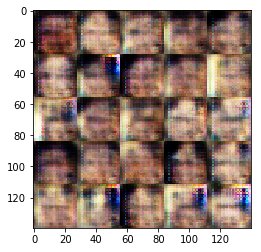

Epoch 1/1... Discriminator Loss: 1.5917... Generator Loss: 0.5795
Epoch 1/1... Discriminator Loss: 1.5339... Generator Loss: 0.6767
Epoch 1/1... Discriminator Loss: 1.5454... Generator Loss: 0.6514
Epoch 1/1... Discriminator Loss: 1.5284... Generator Loss: 0.6153
Epoch 1/1... Discriminator Loss: 1.5694... Generator Loss: 0.5861
Epoch 1/1... Discriminator Loss: 1.5612... Generator Loss: 0.5696
Epoch 1/1... Discriminator Loss: 1.5549... Generator Loss: 0.6360
Epoch 1/1... Discriminator Loss: 1.5510... Generator Loss: 0.5431
Epoch 1/1... Discriminator Loss: 1.6387... Generator Loss: 0.5504
Epoch 1/1... Discriminator Loss: 1.5726... Generator Loss: 0.6004


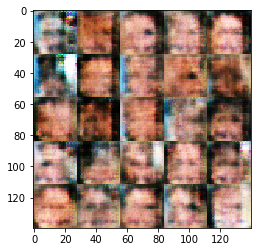

Epoch 1/1... Discriminator Loss: 1.6225... Generator Loss: 0.6231
Epoch 1/1... Discriminator Loss: 1.6214... Generator Loss: 0.5606
Epoch 1/1... Discriminator Loss: 1.6289... Generator Loss: 0.5312
Epoch 1/1... Discriminator Loss: 1.5505... Generator Loss: 0.6464
Epoch 1/1... Discriminator Loss: 1.6279... Generator Loss: 0.6884
Epoch 1/1... Discriminator Loss: 1.5703... Generator Loss: 0.5559
Epoch 1/1... Discriminator Loss: 1.5936... Generator Loss: 0.6696
Epoch 1/1... Discriminator Loss: 1.4988... Generator Loss: 0.6936
Epoch 1/1... Discriminator Loss: 1.6177... Generator Loss: 0.5376
Epoch 1/1... Discriminator Loss: 1.5553... Generator Loss: 0.6195


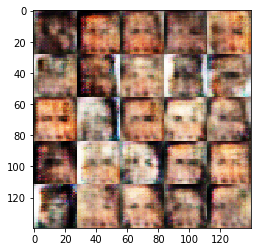

Epoch 1/1... Discriminator Loss: 1.6168... Generator Loss: 0.6159
Epoch 1/1... Discriminator Loss: 1.6543... Generator Loss: 0.5347
Epoch 1/1... Discriminator Loss: 1.6334... Generator Loss: 0.6104
Epoch 1/1... Discriminator Loss: 1.6515... Generator Loss: 0.5214
Epoch 1/1... Discriminator Loss: 1.6001... Generator Loss: 0.5452
Epoch 1/1... Discriminator Loss: 1.5498... Generator Loss: 0.6800
Epoch 1/1... Discriminator Loss: 1.5621... Generator Loss: 0.5735
Epoch 1/1... Discriminator Loss: 1.6304... Generator Loss: 0.5767
Epoch 1/1... Discriminator Loss: 1.6581... Generator Loss: 0.6726
Epoch 1/1... Discriminator Loss: 1.6596... Generator Loss: 0.5159


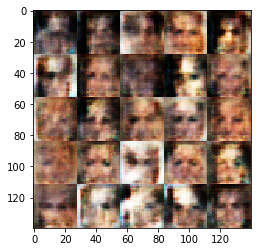

Epoch 1/1... Discriminator Loss: 1.5663... Generator Loss: 0.5118
Epoch 1/1... Discriminator Loss: 1.5666... Generator Loss: 0.6030
Epoch 1/1... Discriminator Loss: 1.5745... Generator Loss: 0.6039
Epoch 1/1... Discriminator Loss: 1.6073... Generator Loss: 0.6851
Epoch 1/1... Discriminator Loss: 1.5856... Generator Loss: 0.5944
Epoch 1/1... Discriminator Loss: 1.6924... Generator Loss: 0.5226
Epoch 1/1... Discriminator Loss: 1.5805... Generator Loss: 0.5546
Epoch 1/1... Discriminator Loss: 1.5263... Generator Loss: 0.6575
Epoch 1/1... Discriminator Loss: 1.5994... Generator Loss: 0.5137
Epoch 1/1... Discriminator Loss: 1.5748... Generator Loss: 0.5785


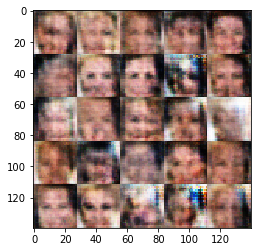

Epoch 1/1... Discriminator Loss: 1.5514... Generator Loss: 0.6445
Epoch 1/1... Discriminator Loss: 1.5484... Generator Loss: 0.6125
Epoch 1/1... Discriminator Loss: 1.5651... Generator Loss: 0.6381
Epoch 1/1... Discriminator Loss: 1.5234... Generator Loss: 0.7807
Epoch 1/1... Discriminator Loss: 1.5387... Generator Loss: 0.6373
Epoch 1/1... Discriminator Loss: 1.6348... Generator Loss: 0.5510
Epoch 1/1... Discriminator Loss: 1.5851... Generator Loss: 0.5539
Epoch 1/1... Discriminator Loss: 1.6221... Generator Loss: 0.6612
Epoch 1/1... Discriminator Loss: 1.6183... Generator Loss: 0.6352
Epoch 1/1... Discriminator Loss: 1.5746... Generator Loss: 0.5756


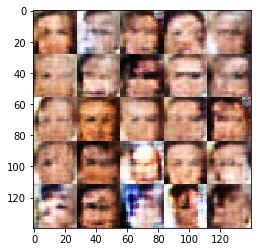

Epoch 1/1... Discriminator Loss: 1.5195... Generator Loss: 0.6323
Epoch 1/1... Discriminator Loss: 1.5303... Generator Loss: 0.5926
Epoch 1/1... Discriminator Loss: 1.5252... Generator Loss: 0.5787
Epoch 1/1... Discriminator Loss: 1.6429... Generator Loss: 0.5450
Epoch 1/1... Discriminator Loss: 1.5810... Generator Loss: 0.5863
Epoch 1/1... Discriminator Loss: 1.6406... Generator Loss: 0.5467
Epoch 1/1... Discriminator Loss: 1.6502... Generator Loss: 0.5747
Epoch 1/1... Discriminator Loss: 1.5757... Generator Loss: 0.5866
Epoch 1/1... Discriminator Loss: 1.5736... Generator Loss: 0.5995
Epoch 1/1... Discriminator Loss: 1.5416... Generator Loss: 0.5816


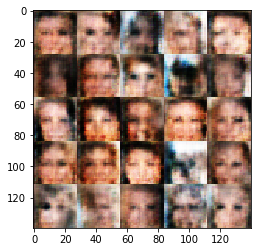

Epoch 1/1... Discriminator Loss: 1.5017... Generator Loss: 0.5530
Epoch 1/1... Discriminator Loss: 1.5920... Generator Loss: 0.6150
Epoch 1/1... Discriminator Loss: 1.6243... Generator Loss: 0.5920
Epoch 1/1... Discriminator Loss: 1.5987... Generator Loss: 0.5837
Epoch 1/1... Discriminator Loss: 1.5638... Generator Loss: 0.6729
Epoch 1/1... Discriminator Loss: 1.6162... Generator Loss: 0.5598
Epoch 1/1... Discriminator Loss: 1.5722... Generator Loss: 0.5205
Epoch 1/1... Discriminator Loss: 1.5890... Generator Loss: 0.5561
Epoch 1/1... Discriminator Loss: 1.5380... Generator Loss: 0.6533
Epoch 1/1... Discriminator Loss: 1.6485... Generator Loss: 0.5043


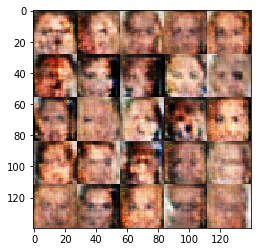

Epoch 1/1... Discriminator Loss: 1.6141... Generator Loss: 0.5963
Epoch 1/1... Discriminator Loss: 1.5521... Generator Loss: 0.5504
Epoch 1/1... Discriminator Loss: 1.5832... Generator Loss: 0.5739
Epoch 1/1... Discriminator Loss: 1.6070... Generator Loss: 0.5630
Epoch 1/1... Discriminator Loss: 1.5726... Generator Loss: 0.6031
Epoch 1/1... Discriminator Loss: 1.5590... Generator Loss: 0.6099
Epoch 1/1... Discriminator Loss: 1.5379... Generator Loss: 0.6502
Epoch 1/1... Discriminator Loss: 1.5875... Generator Loss: 0.5290
Epoch 1/1... Discriminator Loss: 1.5978... Generator Loss: 0.5473
Epoch 1/1... Discriminator Loss: 1.6313... Generator Loss: 0.5724


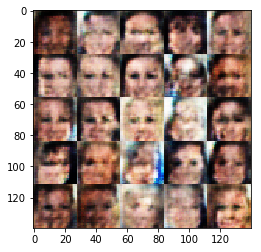

Epoch 1/1... Discriminator Loss: 1.6167... Generator Loss: 0.5567
Epoch 1/1... Discriminator Loss: 1.6031... Generator Loss: 0.5840
Epoch 1/1... Discriminator Loss: 1.6127... Generator Loss: 0.5283
Epoch 1/1... Discriminator Loss: 1.5795... Generator Loss: 0.5632
Epoch 1/1... Discriminator Loss: 1.5148... Generator Loss: 0.6130
Epoch 1/1... Discriminator Loss: 1.6051... Generator Loss: 0.5266
Epoch 1/1... Discriminator Loss: 1.6280... Generator Loss: 0.5529
Epoch 1/1... Discriminator Loss: 1.6443... Generator Loss: 0.4897
Epoch 1/1... Discriminator Loss: 1.5614... Generator Loss: 0.6078
Epoch 1/1... Discriminator Loss: 1.5980... Generator Loss: 0.6344


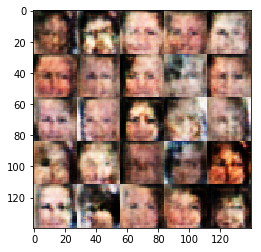

Epoch 1/1... Discriminator Loss: 1.5341... Generator Loss: 0.6189
Epoch 1/1... Discriminator Loss: 1.6009... Generator Loss: 0.5975
Epoch 1/1... Discriminator Loss: 1.5660... Generator Loss: 0.6188
Epoch 1/1... Discriminator Loss: 1.6376... Generator Loss: 0.5276
Epoch 1/1... Discriminator Loss: 1.6001... Generator Loss: 0.5623
Epoch 1/1... Discriminator Loss: 1.5432... Generator Loss: 0.6509
Epoch 1/1... Discriminator Loss: 1.6553... Generator Loss: 0.5419
Epoch 1/1... Discriminator Loss: 1.5915... Generator Loss: 0.5636
Epoch 1/1... Discriminator Loss: 1.5528... Generator Loss: 0.6393
Epoch 1/1... Discriminator Loss: 1.5862... Generator Loss: 0.6106


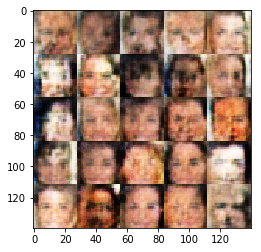

Epoch 1/1... Discriminator Loss: 1.5386... Generator Loss: 0.6343
Epoch 1/1... Discriminator Loss: 1.5220... Generator Loss: 0.6107
Epoch 1/1... Discriminator Loss: 1.5562... Generator Loss: 0.6178
Epoch 1/1... Discriminator Loss: 1.5724... Generator Loss: 0.5962
Epoch 1/1... Discriminator Loss: 1.5753... Generator Loss: 0.5532
Epoch 1/1... Discriminator Loss: 1.6067... Generator Loss: 0.5730
Epoch 1/1... Discriminator Loss: 1.6143... Generator Loss: 0.5728
Epoch 1/1... Discriminator Loss: 1.5744... Generator Loss: 0.5604
Epoch 1/1... Discriminator Loss: 1.6901... Generator Loss: 0.5203
Epoch 1/1... Discriminator Loss: 1.6481... Generator Loss: 0.5920


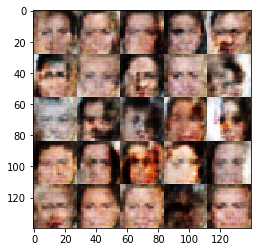

Epoch 1/1... Discriminator Loss: 1.6526... Generator Loss: 0.5270
Epoch 1/1... Discriminator Loss: 1.5222... Generator Loss: 0.6559
Epoch 1/1... Discriminator Loss: 1.5259... Generator Loss: 0.5754
Epoch 1/1... Discriminator Loss: 1.6029... Generator Loss: 0.5410
Epoch 1/1... Discriminator Loss: 1.5739... Generator Loss: 0.5064
Epoch 1/1... Discriminator Loss: 1.5473... Generator Loss: 0.6485
Epoch 1/1... Discriminator Loss: 1.5735... Generator Loss: 0.6029
Epoch 1/1... Discriminator Loss: 1.5632... Generator Loss: 0.5958
Epoch 1/1... Discriminator Loss: 1.5708... Generator Loss: 0.6068
Epoch 1/1... Discriminator Loss: 1.6384... Generator Loss: 0.5771


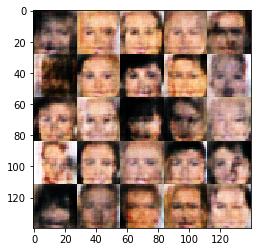

Epoch 1/1... Discriminator Loss: 1.5984... Generator Loss: 0.5776
Epoch 1/1... Discriminator Loss: 1.5850... Generator Loss: 0.5946
Epoch 1/1... Discriminator Loss: 1.6635... Generator Loss: 0.5550
Epoch 1/1... Discriminator Loss: 1.5582... Generator Loss: 0.5925
Epoch 1/1... Discriminator Loss: 1.6170... Generator Loss: 0.5447
Epoch 1/1... Discriminator Loss: 1.6328... Generator Loss: 0.5157
Epoch 1/1... Discriminator Loss: 1.6026... Generator Loss: 0.6065
Epoch 1/1... Discriminator Loss: 1.5720... Generator Loss: 0.6265
Epoch 1/1... Discriminator Loss: 1.6341... Generator Loss: 0.5966
Epoch 1/1... Discriminator Loss: 1.5871... Generator Loss: 0.5847


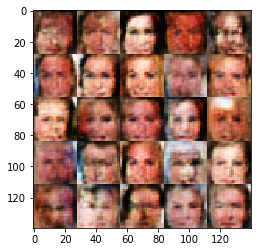

Epoch 1/1... Discriminator Loss: 1.5111... Generator Loss: 0.6379
Epoch 1/1... Discriminator Loss: 1.6223... Generator Loss: 0.5975
Epoch 1/1... Discriminator Loss: 1.5620... Generator Loss: 0.6045
Epoch 1/1... Discriminator Loss: 1.5873... Generator Loss: 0.5638
Epoch 1/1... Discriminator Loss: 1.6399... Generator Loss: 0.5652
Epoch 1/1... Discriminator Loss: 1.5298... Generator Loss: 0.6343
Epoch 1/1... Discriminator Loss: 1.5972... Generator Loss: 0.5762
Epoch 1/1... Discriminator Loss: 1.4872... Generator Loss: 0.6646
Epoch 1/1... Discriminator Loss: 1.5820... Generator Loss: 0.6490
Epoch 1/1... Discriminator Loss: 1.5907... Generator Loss: 0.5976


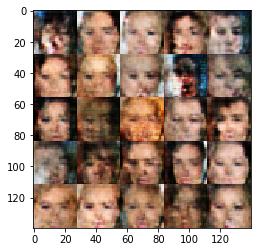

Epoch 1/1... Discriminator Loss: 1.5780... Generator Loss: 0.6069
Epoch 1/1... Discriminator Loss: 1.5652... Generator Loss: 0.6568
Epoch 1/1... Discriminator Loss: 1.6202... Generator Loss: 0.6204
Epoch 1/1... Discriminator Loss: 1.5639... Generator Loss: 0.6017
Epoch 1/1... Discriminator Loss: 1.5539... Generator Loss: 0.6128
Epoch 1/1... Discriminator Loss: 1.5651... Generator Loss: 0.5931
Epoch 1/1... Discriminator Loss: 1.5563... Generator Loss: 0.5910
Epoch 1/1... Discriminator Loss: 1.5895... Generator Loss: 0.6128
Epoch 1/1... Discriminator Loss: 1.5571... Generator Loss: 0.6157
Epoch 1/1... Discriminator Loss: 1.6009... Generator Loss: 0.5427


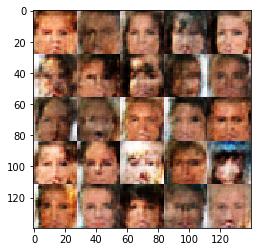

Epoch 1/1... Discriminator Loss: 1.6609... Generator Loss: 0.5338
Epoch 1/1... Discriminator Loss: 1.5859... Generator Loss: 0.5690
Epoch 1/1... Discriminator Loss: 1.5753... Generator Loss: 0.5837
Epoch 1/1... Discriminator Loss: 1.5630... Generator Loss: 0.5871
Epoch 1/1... Discriminator Loss: 1.5297... Generator Loss: 0.6157
Epoch 1/1... Discriminator Loss: 1.6134... Generator Loss: 0.5740
Epoch 1/1... Discriminator Loss: 1.5836... Generator Loss: 0.5519
Epoch 1/1... Discriminator Loss: 1.6011... Generator Loss: 0.5839
Epoch 1/1... Discriminator Loss: 1.6310... Generator Loss: 0.5494
Epoch 1/1... Discriminator Loss: 1.6433... Generator Loss: 0.5409


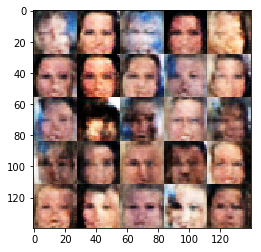

Epoch 1/1... Discriminator Loss: 1.5520... Generator Loss: 0.6564
Epoch 1/1... Discriminator Loss: 1.5604... Generator Loss: 0.5937
Epoch 1/1... Discriminator Loss: 1.5933... Generator Loss: 0.5504
Epoch 1/1... Discriminator Loss: 1.5692... Generator Loss: 0.6287
Epoch 1/1... Discriminator Loss: 1.5395... Generator Loss: 0.6307
Epoch 1/1... Discriminator Loss: 1.5400... Generator Loss: 0.6324
Epoch 1/1... Discriminator Loss: 1.6414... Generator Loss: 0.5354
Epoch 1/1... Discriminator Loss: 1.5301... Generator Loss: 0.6427
Epoch 1/1... Discriminator Loss: 1.5151... Generator Loss: 0.6499
Epoch 1/1... Discriminator Loss: 1.5887... Generator Loss: 0.6415


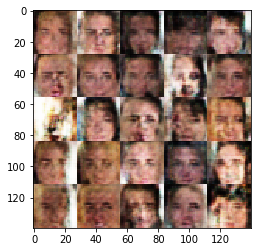

Epoch 1/1... Discriminator Loss: 1.5804... Generator Loss: 0.5444
Epoch 1/1... Discriminator Loss: 1.5492... Generator Loss: 0.6036
Epoch 1/1... Discriminator Loss: 1.5423... Generator Loss: 0.6742
Epoch 1/1... Discriminator Loss: 1.5545... Generator Loss: 0.6294
Epoch 1/1... Discriminator Loss: 1.6096... Generator Loss: 0.5794
Epoch 1/1... Discriminator Loss: 1.6100... Generator Loss: 0.5758
Epoch 1/1... Discriminator Loss: 1.5591... Generator Loss: 0.6077
Epoch 1/1... Discriminator Loss: 1.6151... Generator Loss: 0.5699
Epoch 1/1... Discriminator Loss: 1.5771... Generator Loss: 0.5501
Epoch 1/1... Discriminator Loss: 1.5344... Generator Loss: 0.6309


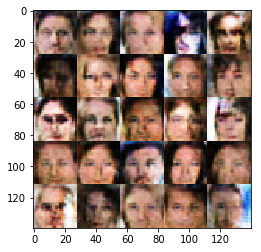

Epoch 1/1... Discriminator Loss: 1.5394... Generator Loss: 0.5921
Epoch 1/1... Discriminator Loss: 1.4856... Generator Loss: 0.6695
Epoch 1/1... Discriminator Loss: 1.5739... Generator Loss: 0.5683
Epoch 1/1... Discriminator Loss: 1.5833... Generator Loss: 0.5878
Epoch 1/1... Discriminator Loss: 1.6341... Generator Loss: 0.5625
Epoch 1/1... Discriminator Loss: 1.5584... Generator Loss: 0.6012
Epoch 1/1... Discriminator Loss: 1.5967... Generator Loss: 0.6092
Epoch 1/1... Discriminator Loss: 1.5705... Generator Loss: 0.6113
Epoch 1/1... Discriminator Loss: 1.5761... Generator Loss: 0.5843
Epoch 1/1... Discriminator Loss: 1.5605... Generator Loss: 0.6018


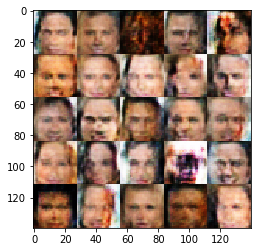

Epoch 1/1... Discriminator Loss: 1.5366... Generator Loss: 0.6306
Epoch 1/1... Discriminator Loss: 1.5377... Generator Loss: 0.6105
Epoch 1/1... Discriminator Loss: 1.5566... Generator Loss: 0.6946
Epoch 1/1... Discriminator Loss: 1.5019... Generator Loss: 0.6525
Epoch 1/1... Discriminator Loss: 1.5508... Generator Loss: 0.6109
Epoch 1/1... Discriminator Loss: 1.5218... Generator Loss: 0.6402
Epoch 1/1... Discriminator Loss: 1.5157... Generator Loss: 0.6527
Epoch 1/1... Discriminator Loss: 1.5666... Generator Loss: 0.5997
Epoch 1/1... Discriminator Loss: 1.5216... Generator Loss: 0.6570
Epoch 1/1... Discriminator Loss: 1.5390... Generator Loss: 0.6784


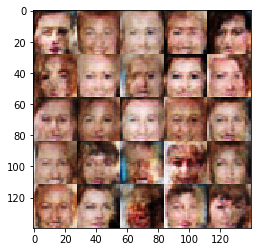

Epoch 1/1... Discriminator Loss: 1.5339... Generator Loss: 0.6201
Epoch 1/1... Discriminator Loss: 1.5221... Generator Loss: 0.6333
Epoch 1/1... Discriminator Loss: 1.4727... Generator Loss: 0.7050
Epoch 1/1... Discriminator Loss: 1.5718... Generator Loss: 0.5925
Epoch 1/1... Discriminator Loss: 1.5698... Generator Loss: 0.6064
Epoch 1/1... Discriminator Loss: 1.5626... Generator Loss: 0.6036
Epoch 1/1... Discriminator Loss: 1.5720... Generator Loss: 0.5945
Epoch 1/1... Discriminator Loss: 1.5477... Generator Loss: 0.5962
Epoch 1/1... Discriminator Loss: 1.5138... Generator Loss: 0.6531
Epoch 1/1... Discriminator Loss: 1.5129... Generator Loss: 0.6934


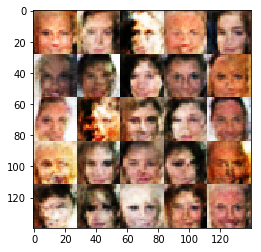

Epoch 1/1... Discriminator Loss: 1.5536... Generator Loss: 0.6215
Epoch 1/1... Discriminator Loss: 1.4795... Generator Loss: 0.6382
Epoch 1/1... Discriminator Loss: 1.5375... Generator Loss: 0.6662
Epoch 1/1... Discriminator Loss: 1.5164... Generator Loss: 0.6640
Epoch 1/1... Discriminator Loss: 1.5495... Generator Loss: 0.6457
Epoch 1/1... Discriminator Loss: 1.5505... Generator Loss: 0.6091
Epoch 1/1... Discriminator Loss: 1.5636... Generator Loss: 0.6104
Epoch 1/1... Discriminator Loss: 1.5166... Generator Loss: 0.6531
Epoch 1/1... Discriminator Loss: 1.5042... Generator Loss: 0.6563
Epoch 1/1... Discriminator Loss: 1.5076... Generator Loss: 0.6028


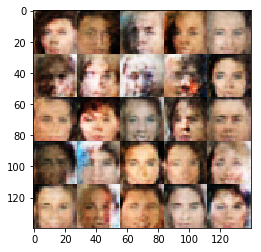

Epoch 1/1... Discriminator Loss: 1.5160... Generator Loss: 0.6417
Epoch 1/1... Discriminator Loss: 1.5060... Generator Loss: 0.6775
Epoch 1/1... Discriminator Loss: 1.5395... Generator Loss: 0.6291
Epoch 1/1... Discriminator Loss: 1.5254... Generator Loss: 0.6595
Epoch 1/1... Discriminator Loss: 1.5621... Generator Loss: 0.5964
Epoch 1/1... Discriminator Loss: 1.5613... Generator Loss: 0.6209
Epoch 1/1... Discriminator Loss: 1.5523... Generator Loss: 0.6230
Epoch 1/1... Discriminator Loss: 1.5943... Generator Loss: 0.5618
Epoch 1/1... Discriminator Loss: 1.5651... Generator Loss: 0.6174
Epoch 1/1... Discriminator Loss: 1.5108... Generator Loss: 0.6595


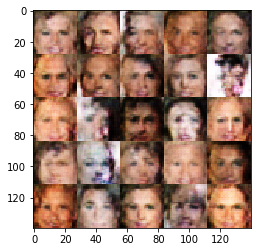

Epoch 1/1... Discriminator Loss: 1.5360... Generator Loss: 0.6139
Epoch 1/1... Discriminator Loss: 1.5475... Generator Loss: 0.5913
Epoch 1/1... Discriminator Loss: 1.5808... Generator Loss: 0.5696
Epoch 1/1... Discriminator Loss: 1.5378... Generator Loss: 0.6229
Epoch 1/1... Discriminator Loss: 1.5252... Generator Loss: 0.6147
Epoch 1/1... Discriminator Loss: 1.5458... Generator Loss: 0.6424
Epoch 1/1... Discriminator Loss: 1.5216... Generator Loss: 0.6336
Epoch 1/1... Discriminator Loss: 1.5253... Generator Loss: 0.6161
Epoch 1/1... Discriminator Loss: 1.5153... Generator Loss: 0.6440
Epoch 1/1... Discriminator Loss: 1.5223... Generator Loss: 0.6391


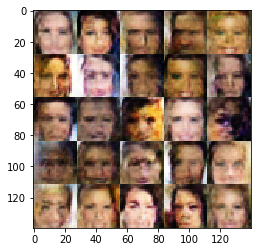

Epoch 1/1... Discriminator Loss: 1.5316... Generator Loss: 0.6533
Epoch 1/1... Discriminator Loss: 1.4924... Generator Loss: 0.6690
Epoch 1/1... Discriminator Loss: 1.5482... Generator Loss: 0.6014
Epoch 1/1... Discriminator Loss: 1.5031... Generator Loss: 0.6440
Epoch 1/1... Discriminator Loss: 1.5198... Generator Loss: 0.6269
Epoch 1/1... Discriminator Loss: 1.5775... Generator Loss: 0.5951
Epoch 1/1... Discriminator Loss: 1.5256... Generator Loss: 0.6218
Epoch 1/1... Discriminator Loss: 1.5208... Generator Loss: 0.6288
Epoch 1/1... Discriminator Loss: 1.5110... Generator Loss: 0.6347
Epoch 1/1... Discriminator Loss: 1.5282... Generator Loss: 0.6252


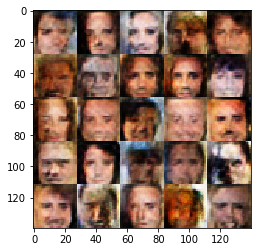

Epoch 1/1... Discriminator Loss: 1.5038... Generator Loss: 0.6612
Epoch 1/1... Discriminator Loss: 1.5173... Generator Loss: 0.6218
Epoch 1/1... Discriminator Loss: 1.5104... Generator Loss: 0.6637
Epoch 1/1... Discriminator Loss: 1.5366... Generator Loss: 0.6296
Epoch 1/1... Discriminator Loss: 1.4920... Generator Loss: 0.6563
Epoch 1/1... Discriminator Loss: 1.5812... Generator Loss: 0.6662
Epoch 1/1... Discriminator Loss: 1.4911... Generator Loss: 0.6538
Epoch 1/1... Discriminator Loss: 1.5409... Generator Loss: 0.6339
Epoch 1/1... Discriminator Loss: 1.4989... Generator Loss: 0.6624
Epoch 1/1... Discriminator Loss: 1.5181... Generator Loss: 0.6651


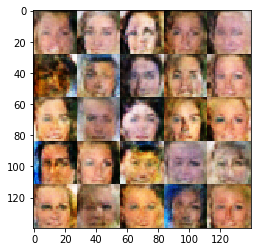

Epoch 1/1... Discriminator Loss: 1.5134... Generator Loss: 0.6221
Epoch 1/1... Discriminator Loss: 1.5109... Generator Loss: 0.6654
Epoch 1/1... Discriminator Loss: 1.4987... Generator Loss: 0.6526
Epoch 1/1... Discriminator Loss: 1.5768... Generator Loss: 0.6287
Epoch 1/1... Discriminator Loss: 1.5381... Generator Loss: 0.6536
Epoch 1/1... Discriminator Loss: 1.5177... Generator Loss: 0.6576
Epoch 1/1... Discriminator Loss: 1.5344... Generator Loss: 0.6144
Epoch 1/1... Discriminator Loss: 1.5206... Generator Loss: 0.6444
Epoch 1/1... Discriminator Loss: 1.4969... Generator Loss: 0.6870
Epoch 1/1... Discriminator Loss: 1.4706... Generator Loss: 0.6743


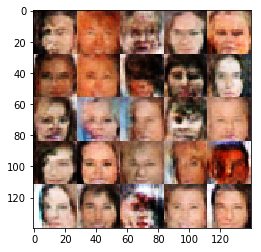

Epoch 1/1... Discriminator Loss: 1.5007... Generator Loss: 0.6513
Epoch 1/1... Discriminator Loss: 1.5471... Generator Loss: 0.6203
Epoch 1/1... Discriminator Loss: 1.5570... Generator Loss: 0.6022
Epoch 1/1... Discriminator Loss: 1.5004... Generator Loss: 0.6735
Epoch 1/1... Discriminator Loss: 1.5032... Generator Loss: 0.6458
Epoch 1/1... Discriminator Loss: 1.5153... Generator Loss: 0.6107
Epoch 1/1... Discriminator Loss: 1.5222... Generator Loss: 0.6509
Epoch 1/1... Discriminator Loss: 1.5344... Generator Loss: 0.6655
Epoch 1/1... Discriminator Loss: 1.5606... Generator Loss: 0.6018
Epoch 1/1... Discriminator Loss: 1.5626... Generator Loss: 0.6118


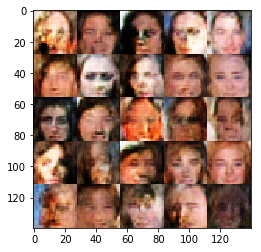

Epoch 1/1... Discriminator Loss: 1.5309... Generator Loss: 0.6517
Epoch 1/1... Discriminator Loss: 1.5133... Generator Loss: 0.6344
Epoch 1/1... Discriminator Loss: 1.5455... Generator Loss: 0.6262
Epoch 1/1... Discriminator Loss: 1.4521... Generator Loss: 0.6992
Epoch 1/1... Discriminator Loss: 1.5140... Generator Loss: 0.6198
Epoch 1/1... Discriminator Loss: 1.5081... Generator Loss: 0.6582


In [13]:
batch_size = 64
z_dim = 128
learning_rate = .002
beta1 = .5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.